In [60]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('climate_action_data.csv') 

In [61]:
# identifying the structure of csv data set
print("First 5 rows:")
print(df.head())

print("\nLast 3 rows:")
print(df.tail(3))

print("\nDataFrame Information summary:")
df.info()

First 5 rows:
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  
3 

In [62]:
#carrying out necessary type conversion, so as to enable cleaning and analysis
numeric_cols=['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for numeric_col in numeric_cols:
    df[numeric_col]= pd.to_numeric(df[numeric_col],errors='coerce')

df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [63]:
#checking for empty cells
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


In [64]:
#filling empty cells according 
for numeric_col in numeric_cols:
    df[numeric_col]=df[numeric_col].fillna(df[numeric_col].mean())
    
for categorical in ['Crop_Type']:
    df[categorical]=df[categorical].fillna(df[categorical].mode()[0])

In [65]:
#dropping rows with missing date 
df = df.dropna(subset=['Date'])

#checking for number record left
df.shape[0]

909

In [66]:
#checking if missing values still existing 
print(df.isnull().sum())

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [67]:
#checking for duplicate entries

duplicates = df.duplicated()
if duplicates.any():
   df = df.drop_duplicates()
   print(df.duplicated().sum(),"Duplicates found and dropped successfully:")
else:
    print("No duplicates found.")

0 Duplicates found and dropped successfully:


In [68]:
#checking for number record left afyer dropping duplicates 
df.shape[0]

798

In [69]:
#descriptive analysis
df.describe()
df_cleaned=df

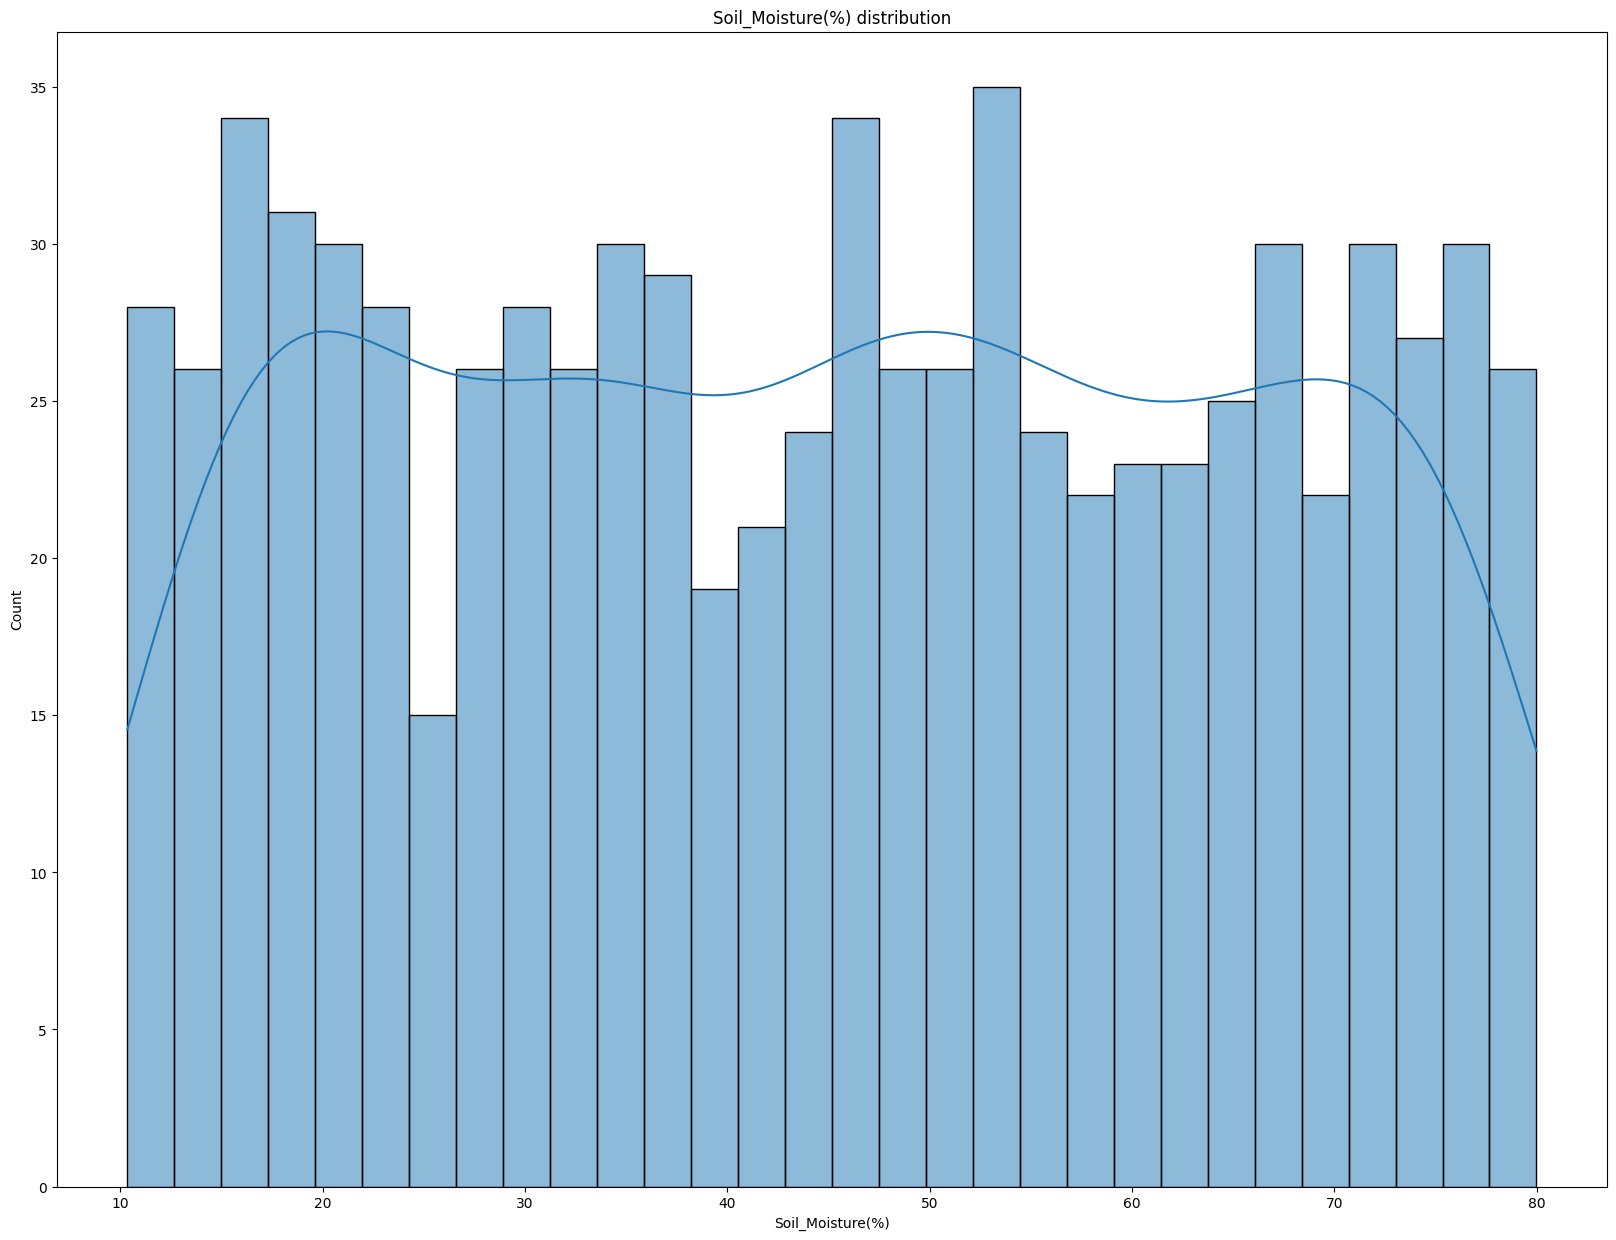

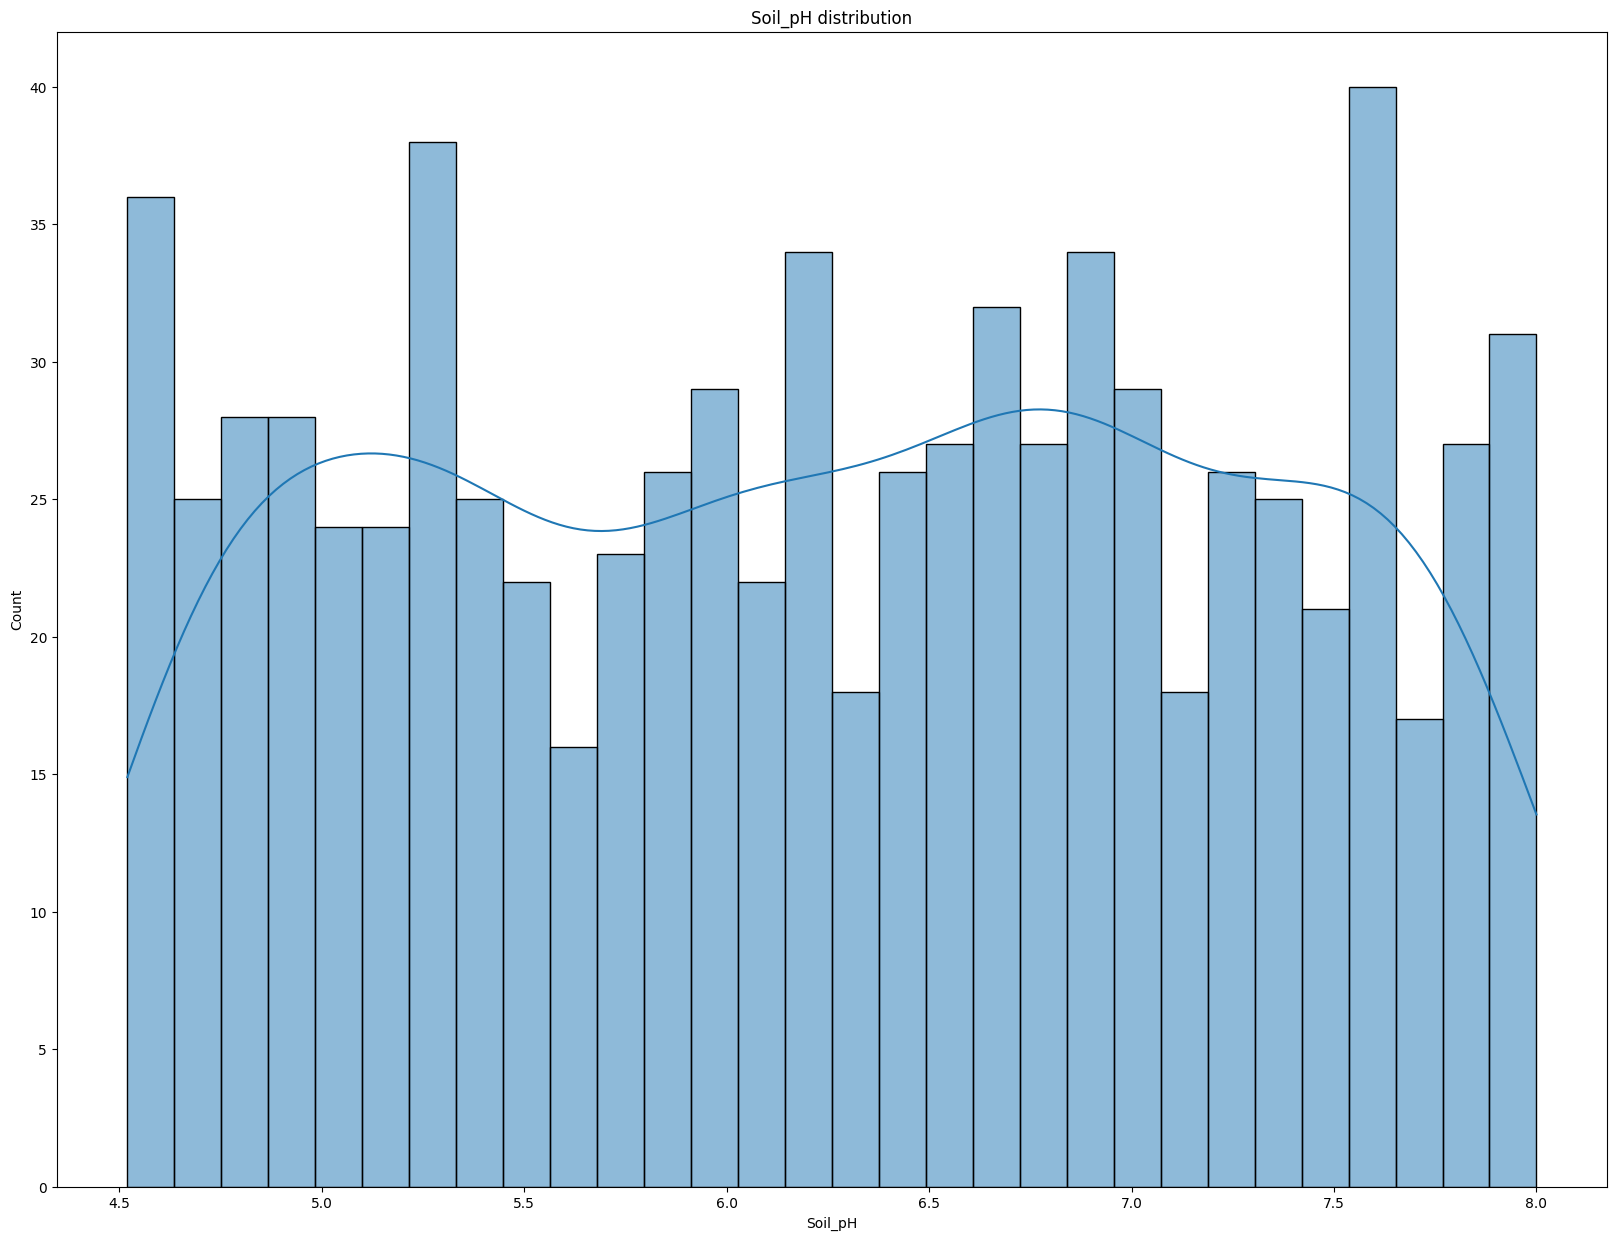

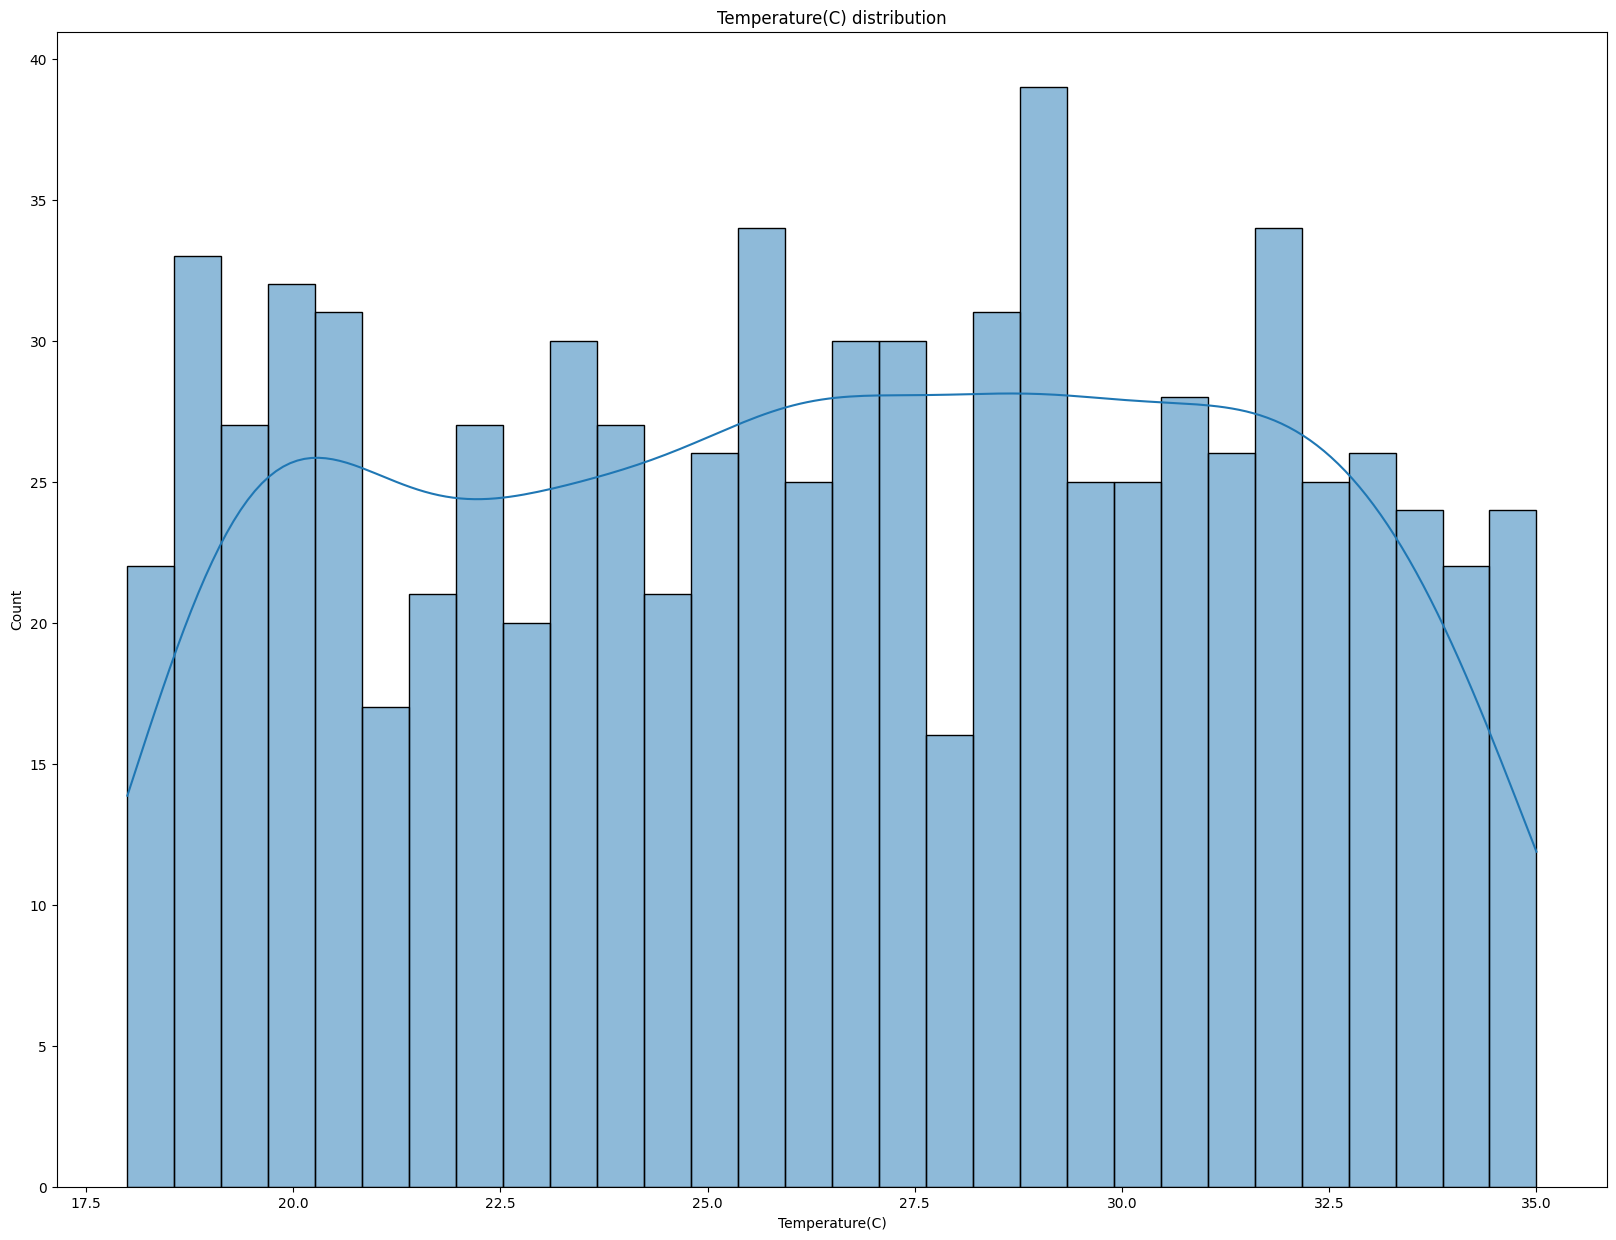

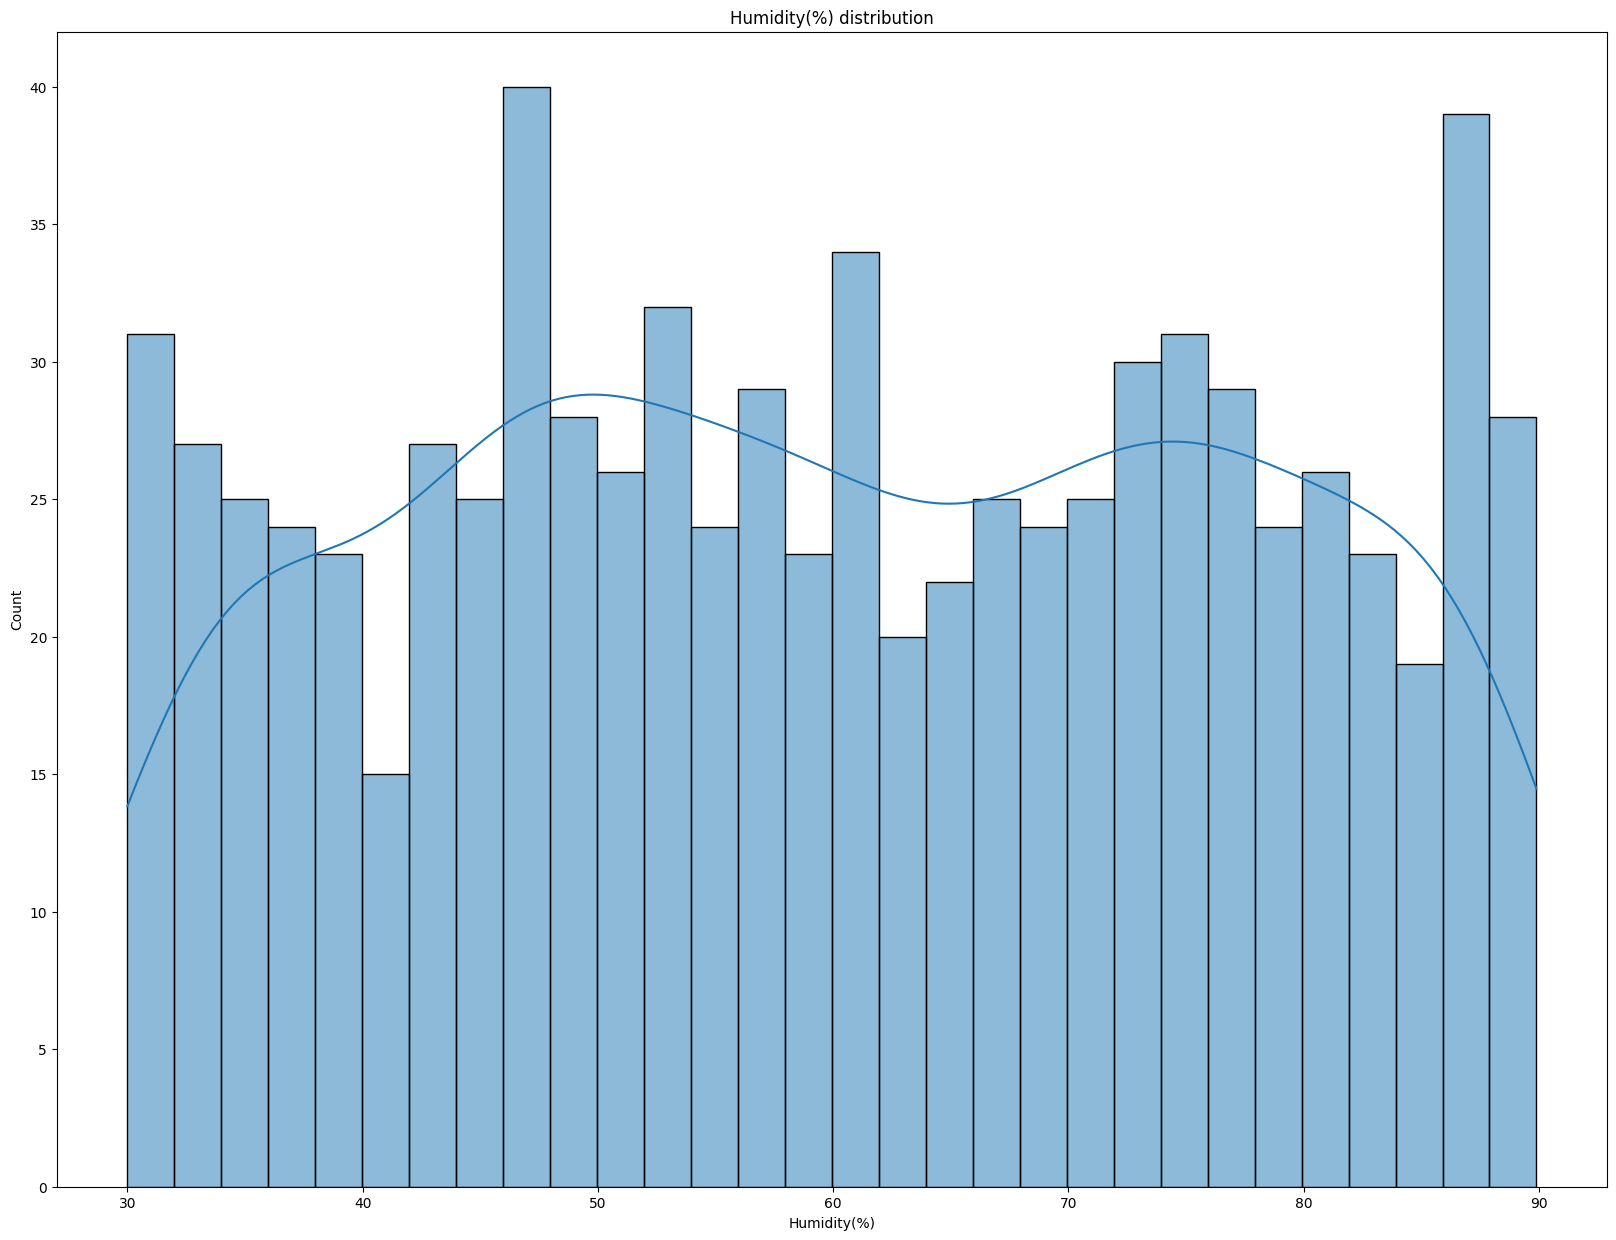

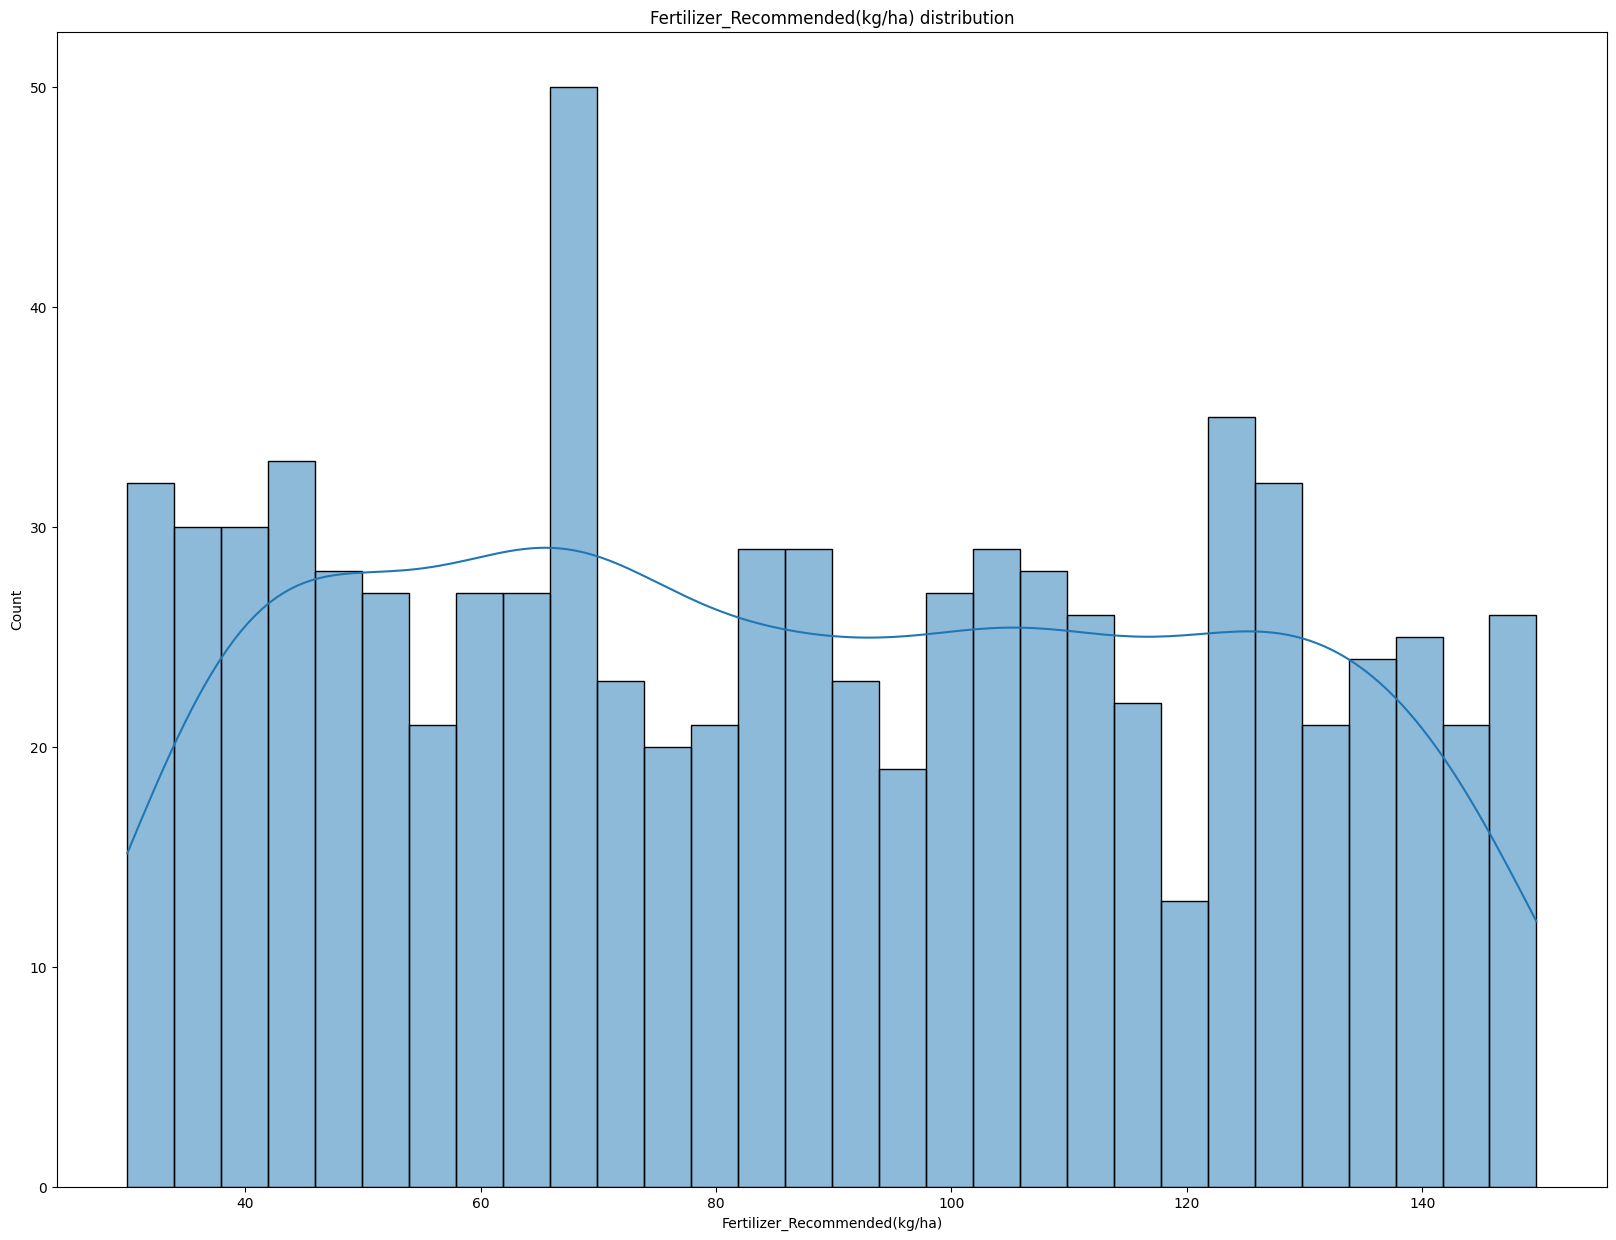

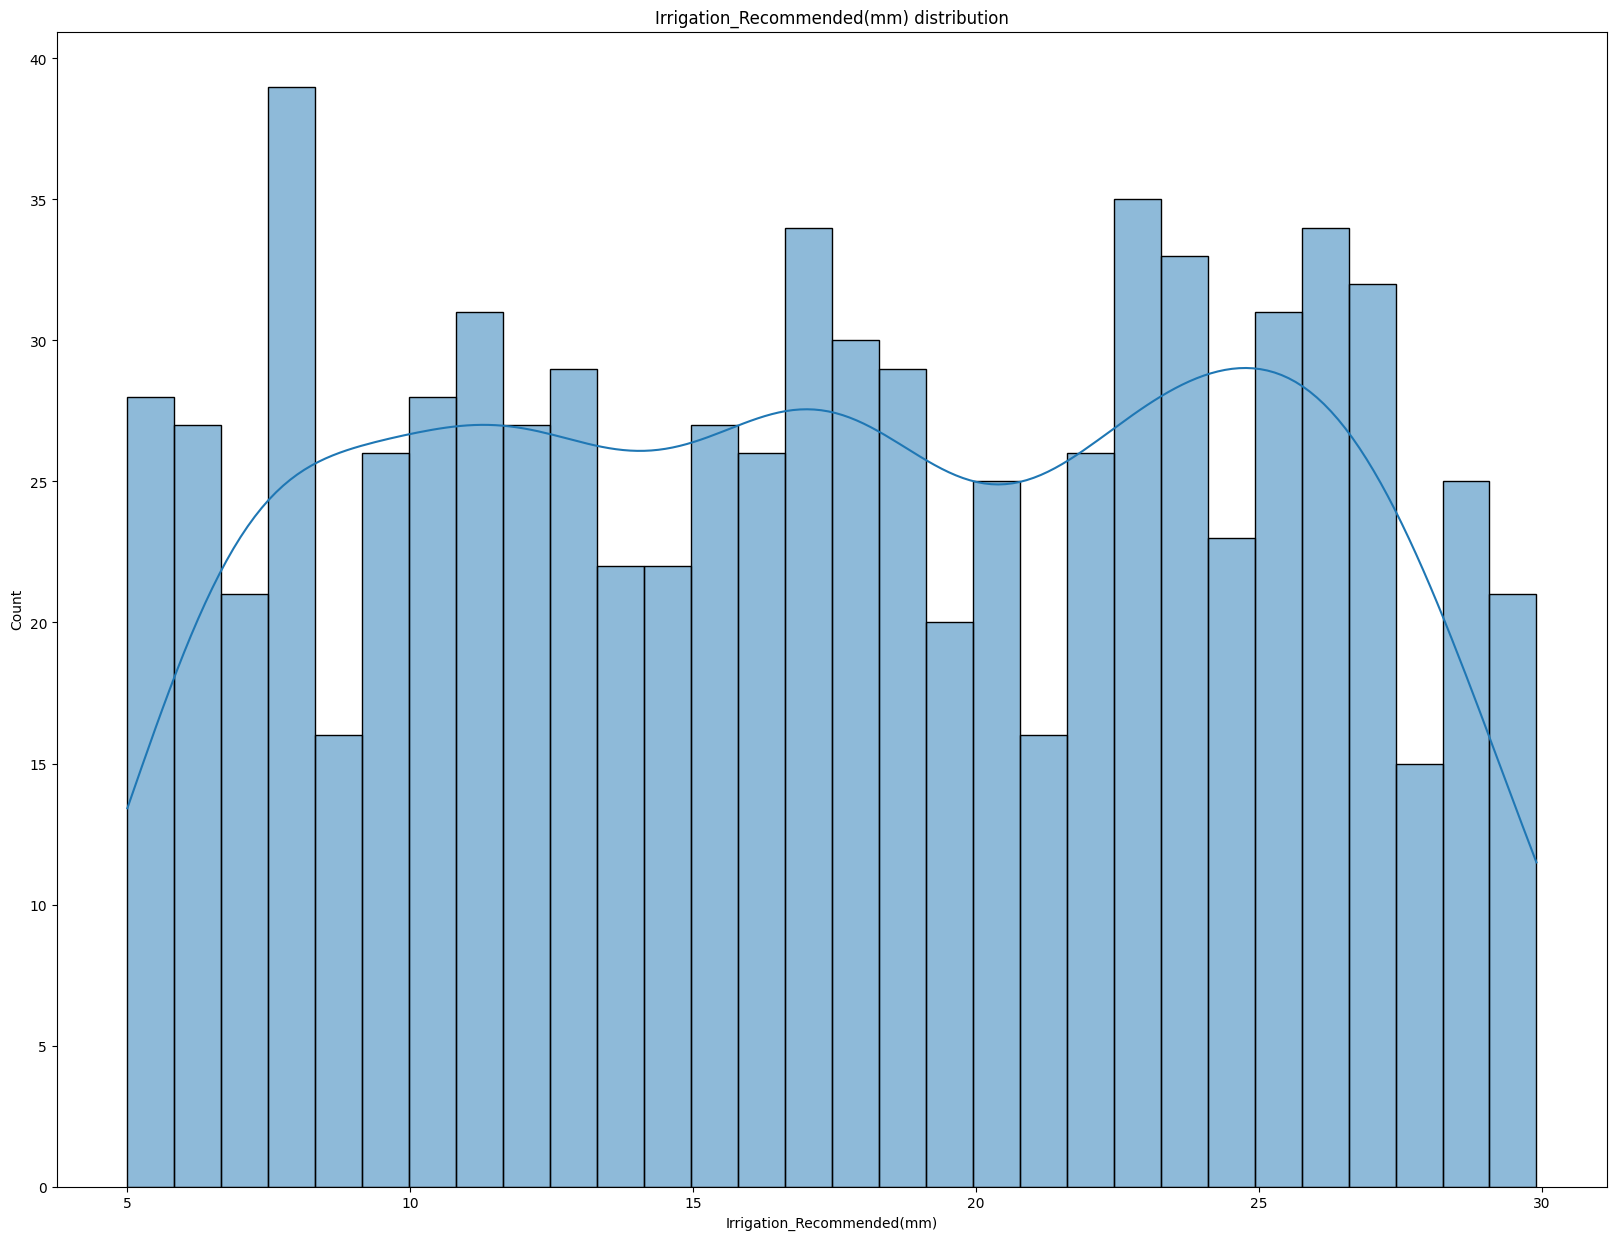

In [70]:
#visualizing the distribution of numeric variables using histograms
for numeric_col in numeric_cols:
    plt.figure(figsize=(20,15))
    # Histogram of 'Duration'
    title= numeric_col+' distribution'
    plt.title(title )
    sns.histplot(df[ numeric_col], bins=30, kde=True)

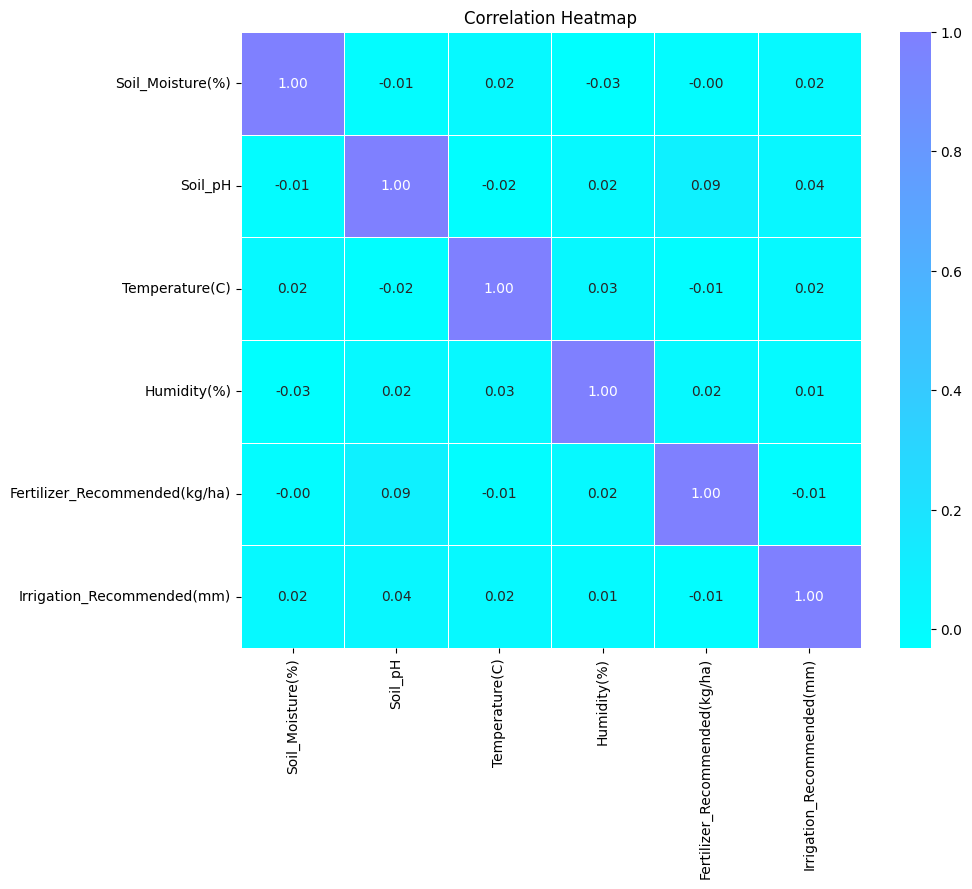

In [71]:
#creating a correlation heatmap to examine the relationships between soil and environmental variables
corr_matrix = df[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='cool', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

In [72]:
#determining the crop type with the highest average soil moisture
print(df.groupby('Crop_Type')['Soil_Moisture(%)'].mean())

Crop_Type
Beans       44.333047
Lettuce     42.927334
Maize       44.948968
Tomatoes    44.181085
Wheat       47.352387
Name: Soil_Moisture(%), dtype: float64


In [ ]:
#exporting  clean dataset as cleaned_precision_agriculture_data.csv 
df_cleaned.to_csv('cleaned_precision_agriculture_data.csv', index=False)

In [ ]:
#conclusions and insights
 #soil_ph and humidity are the variables that bmost influence fertilizer recommendations
#Wheat is the crop type with the highest average soil moisture
